In [16]:
import slabguides as guides
import numpy as np
import matplotlib.pyplot as plt

In [17]:
guide_size = 7e-6
wavelength = 1.55e-6

In [18]:
mode1 = guides.TE_MGMode(mode=1, mirror_distance=guide_size, wavelength=wavelength)
mode2 = guides.TE_MGMode(mode=2, mirror_distance=guide_size, wavelength=wavelength)

y_range = np.linspace(-0.5*guide_size, 0.5*guide_size, 1000)
z_range = np.linspace(0, 3e-4, 1000)

yy, zz = np.meshgrid(y_range, z_range)

In [19]:
Ex1 = mode1.Ex(yy, zz)
Ex2 = mode2.Ex(yy, zz)

Ex = Ex1 + Ex2
ExEx = np.real( Ex * np.conjugate(Ex) )

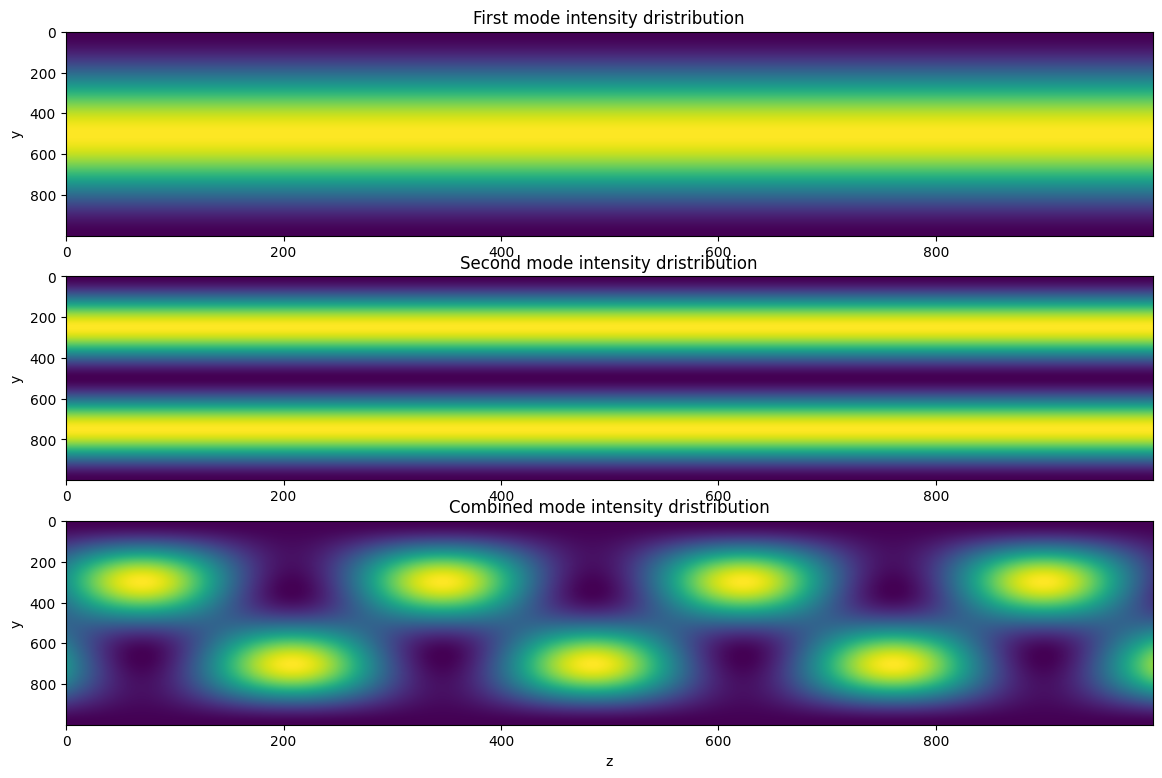

In [20]:
fig, axs = plt.subplots(3, 1, figsize=(16,9))
axs[0].imshow(np.real( Ex1 * np.conjugate(Ex1) ).T, aspect=3/16)
axs[0].set(title="First mode intensity dristribution", ylabel="y")

axs[1].imshow(np.real( Ex2 * np.conjugate(Ex2) ).T, aspect=3/16)
axs[1].set(title="Second mode intensity dristribution", ylabel='y')

axs[2].imshow(ExEx.T, aspect=3/16)
axs[2].set(title="Combined mode intensity dristribution",
           xlabel="z", ylabel="y")
plt.show()


In [21]:
d_mode1 = guides.TE_DGMode(0, 1.45, 1, wavelength, guide_size)
print("Maximum number of modes:", d_mode1.maximum_mode())

Maximum number of modes: 7


C:\Users\Ivan\AppData\Local\Temp\ipykernel_20392\3683061445.py:3: RuntimeWarning: divide by zero encountered in divide
  left_side_equation = lambda theta: np.sqrt( np.sin(d_mode1.theta_c)**2 / np.sin(theta)**2 - 1 ) \


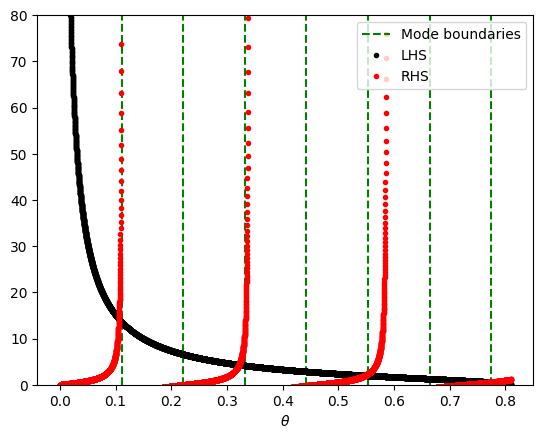

In [22]:
thetas = np.linspace(0, d_mode1.theta_c, 10000)

left_side_equation = lambda theta: np.sqrt( np.sin(d_mode1.theta_c)**2 / np.sin(theta)**2 - 1 ) \
                                / np.cos(d_mode1.theta_c)**2

right_side_equation = lambda theta: np.tan(np.pi * d_mode1.d/d_mode1.wl * np.sin(theta) \
                                           - 0.5*d_mode1.m * np.pi)


mode_boundaries = [i * d_mode1.wl / (2*d_mode1.d) for i in range(1,d_mode1.maximum_mode()+1)]
plt.vlines(mode_boundaries, 0, 100, colors='green', linestyles='dashed', label='Mode boundaries')

plt.plot(thetas, left_side_equation(thetas), 'k.', label='LHS')
plt.plot(thetas, right_side_equation(thetas), 'r.', label='RHS')
plt.xlabel(r"$\theta$")
plt.ylim(0,80)
plt.legend(loc="upper right")
plt.show()

scipy integral: 0.0
Inside integral: 0.991003054683427
Outside integral: 0.008996945316572816
Total integral: 0.9999999999999998


c:\Users\Ivan\AppData\Local\Programs\Python\Python313\Lib\site-packages\matplotlib\cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\Ivan\AppData\Local\Programs\Python\Python313\Lib\site-packages\matplotlib\collections.py:200: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)
c:\Users\Ivan\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\ma\core.py:3463: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval


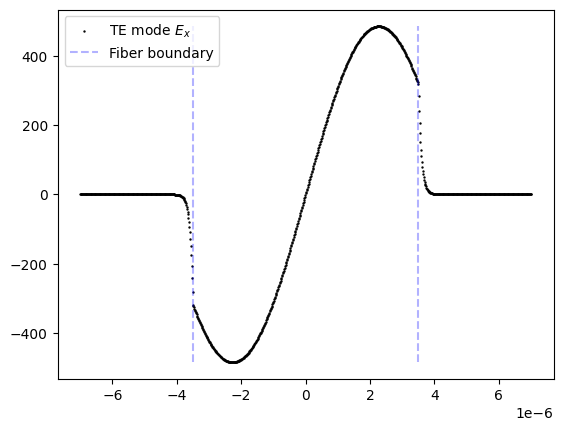

In [23]:
TE_d_mode = guides.TE_DGMode(1, 3, 1, wavelength, guide_size)

y_range = np.linspace(-guide_size, guide_size, 1000)


TE_d_Ex0 = TE_d_mode.Ex(y_range, 0)

plt.scatter(y_range, TE_d_Ex0, c='k', s=0.5, label=r'TE mode $E_x$')
plt.vlines([-0.5*guide_size, 0.5*guide_size], ymin=np.min(TE_d_Ex0), ymax=np.max(TE_d_Ex0),
           colors='blue', linestyles='dashed', label='Fiber boundary', alpha=0.3)
plt.legend()

from scipy.integrate import quad

integrand = lambda y: TE_d_mode._um(y)**2

integral = quad(integrand, -np.inf, np.inf)[0]
inside_integral = quad(integrand, -guide_size/2, guide_size/2)[0]

__, alpha = TE_d_mode.prop_constants()
gamma = TE_d_mode.gamma
outside_integral = alpha**2 / gamma * np.exp(-gamma*guide_size)

print("scipy integral:", integral)

print("Inside integral:", inside_integral)

print("Outside integral:", outside_integral)

print("Total integral:", outside_integral + inside_integral)

d:\Desktop\Aprendizado\Doutorado\Doutorado.Vault\Classes\Optics and photonics\Programs\OptSim\src\optsim\slabguides.py:221: RuntimeWarning: invalid value encountered in sqrt
  B = _np.sqrt( _np.sin(self.theta_c)**2 / _np.sin(theta_test)**2 - 1 )


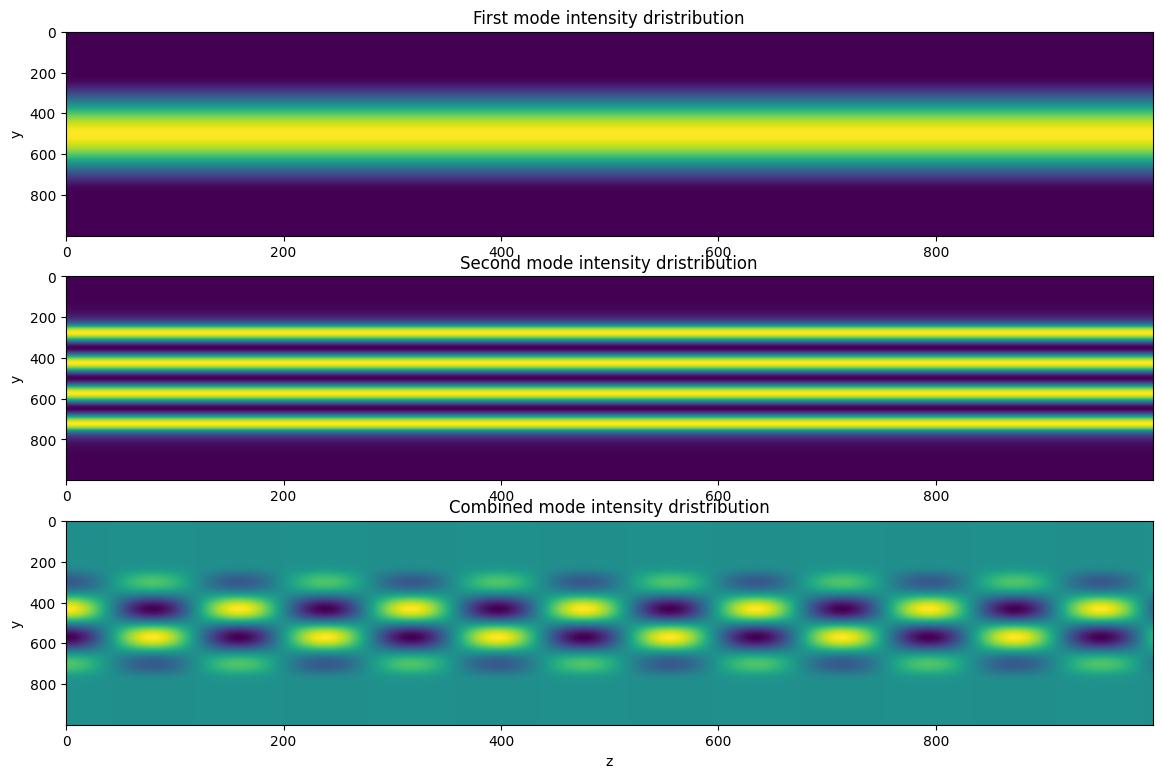

In [24]:
TE0_d_mode = guides.TE_DGMode(0, 1.45, 1.3, wavelength, guide_size)
TE1_d_mode = guides.TE_DGMode(1, 1.45, 1.3, wavelength, guide_size)

z_range = np.linspace(0, 1e-4, 1000)
yy, zz = np.meshgrid(y_range, z_range)

TE0_Ex = TE0_d_mode.Ex(yy, zz)
TE1_Ex = TE1_d_mode.Ex(yy, zz)

TE0_ExEx = np.real( TE0_Ex * np.conjugate(TE0_Ex) )
TE1_ExEx = np.real( TE1_Ex * np.conjugate(TE1_Ex) )

TE_ExEx = np.real( TE0_Ex * np.conjugate(TE1_Ex) )

fig, axs = plt.subplots(3, 1, figsize=(16,9))
axs[0].imshow( TE0_ExEx.T, aspect=3/16)
axs[0].set(title="First mode intensity dristribution", ylabel="y")

axs[1].imshow( TE1_ExEx.T, aspect=3/16)
axs[1].set(title="Second mode intensity dristribution", ylabel='y')

axs[2].imshow( TE_ExEx.T, aspect=3/16)
axs[2].set(title="Combined mode intensity dristribution",
           xlabel="z", ylabel="y")
plt.show()